## Generación del conjunto de datos


Pueden consultar para generar más conjuntos de datos en: https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/  

In [5]:
# Importamos la biblioteca de Sklearn 

from sklearn.datasets import make_circles    # Biblioteca que contiene un conjunto de datos sinteticos
import matplotlib.pyplot as plt               # Biblioteca para visualización grafica
from pandas import DataFrame                 # Bibioteca para manipulación de datos 
import numpy as np                           # Biblioteca para el calculo algebraico 

#X, y = make_circles(n_samples=1000, noise=0.04)   # Generar un conjunto de datos 2D para clasificación binaria

# scatter plot, dots colored by class value
#df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
#colors = {0:'red', 1:'blue'}
#fig, ax = pyplot.subplots()
#grouped = df.groupby('label')
#for key, group in grouped:
#    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
#pyplot.show()

#pyplot.figure(figsize=(7,7))
#pyplot.scatter(X[:,0], X[:,1], c=y, cmap=pyplot.cm.winter)

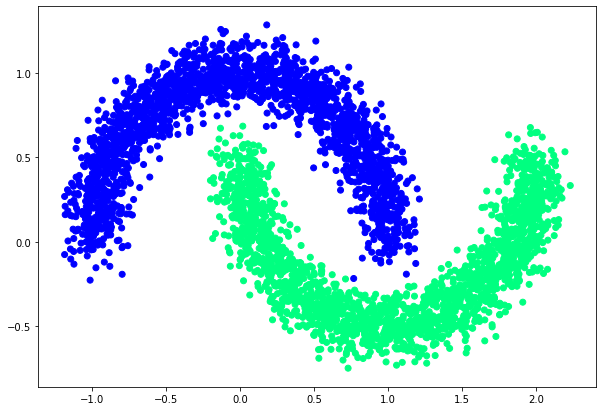

In [33]:
from sklearn import datasets
np.random.seed(0)
X, y = datasets.make_moons(4000, noise=0.10)
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.winter)

<img src="red_neuronal.png">

## Definimos las funciones de activación. 

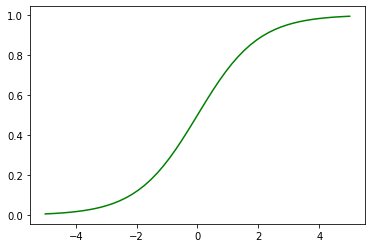

In [9]:
# Función Sigmoide

def sigmoid(x):
    return 1/(1 + np.exp(-x))

_x = np.linspace(-5, 5)

pyplot.plot(_x, sigmoid(_x), c = 'green')
pyplot.show()

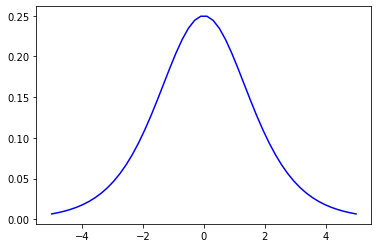

In [10]:
# Derivada de la función sigmoide 

def dev_sig(x): 
    return sigmoid(x)*(1-sigmoid(x))

pyplot.plot(_x, dev_sig(_x), c = 'blue')
pyplot.show()

## Creación de los conjuntos de entrenamiento y prueba

In [34]:
# Separar dentro de un conjunto de entrenamiento y prueba

from sklearn.model_selection import train_test_split                       # Biblioteca para la separación de datos en
                                                                           # conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)   # Se crea un conjunto de prueba del 20% de los datos 

y_train = y_train.reshape(1, y_train.shape[0])
X_train = X_train.T

print("Total de ejemplos para entrenamiento: ", X_train.shape[1])
print("Total de ejemplos para prueba: ", X_test.shape[0] )

Total de ejemplos para entrenamiento:  3200
Total de ejemplos para prueba:  800


## Establecer Hiperparámetros

In [35]:
# Establecemos los hiperparametros 

h1 = 10                     # Número de neuronas en la capa oculta 
lr = 0.0001                 # Taza de aprendizaje para el descenso del gradiente
epocas = 500000             # Numero de veces a iterar 

m = X_train.shape[1]        # Numero de observaciones del conjunto de entrenamiento 

# Inicialización de los pesos y sesgos 
np.random.seed(10)

w1 = 2 * np.random.rand(h1, X_train.shape[0]) -1          # Pesos de la capa oculta 
b1 = 2 * np.random.rand(h1, 1) -1                         # Sesgos de la capa oculta 

w2 = 2 * np.random.rand(y_train.shape[0], h1) -1           # Pesos de la capa de salida 
b2 = 2 * np.random.rand(y_train.shape[0], 1) -1           # Sesgo de la capa de salida 

error_cost = []                                       # Lista contenedora de los valores de la función de costo

print('W1 shape :{0:}'.format(w1.shape))
print('b1 shape :{0:}'.format(b1.shape))
print('W2 shape :{0:}'.format(w2.shape))
print('b2 shape :{0:}'.format(b2.shape))

W1 shape :(10, 2)
b1 shape :(10, 1)
W2 shape :(1, 10)
b2 shape :(1, 1)


In [36]:
for epoca in range (epocas):
    
    # Propagación hacia adelante
    z1 = np.dot(w1, X_train) + b1     # (4, 2) x (2, 240) = (4, 240)
    a1 = sigmoid(z1) # = (4, 240) 

    z2 = np.dot(w2, a1) + b2          # (1, 4) x (4, 240) = (1, 240)
    a2 = sigmoid(z2)

    # Función de costo

    if epoca % 200 == 0:
            loss = -(1/y_train.shape[1]) * np.sum(y_train * np.log(a2) +  ((1-y_train)*np.log(1-a2))) 
            print('Valor de la función de costo: ', loss)
            error_cost.append(loss)

    # Cálculo de las derivadas parciales de la capa de salida

    delta2 = a2 - y_train # (1, 240)
    dcost_w2 = np.dot(delta2, a1.T)  * (1/m)                    # (1, 240) x (4, 240) = (1, 4)
    dcost_b2 = np.sum(delta2, axis=1, keepdims=True) * (1/m)    # (1, 1)

    # Cálculo de las derivadas parciales de la capa oculta

    delta1 = np.dot(w2.T, delta2) * dev_sig(z1)    # (4, 240)

    dcost_w1 = np.dot(delta1, X_train.T)  * (1/m)          # (4, 240) x (2, 240) = (4, 2)
    dcost_b1 = np.sum(delta1, axis = 1, keepdims = True) * (1/m)    # (4, 1)
    
    # Actualización de los pesos y sesgos 
    w1 -= lr * dcost_w1
    b1 -= lr * dcost_b1
    w2 -= lr * dcost_w2
    b2 -= lr * dcost_b2

Valor de la función de costo:  0.6008265258387029
Valor de la función de costo:  0.599997387887802
Valor de la función de costo:  0.5991853586359563
Valor de la función de costo:  0.5983898280868349
Valor de la función de costo:  0.5976102079943054
Valor de la función de costo:  0.5968459311372201
Valor de la función de costo:  0.5960964506142112
Valor de la función de costo:  0.5953612391582842
Valor de la función de costo:  0.5946397884709722
Valor de la función de costo:  0.5939316085757934
Valor de la función de costo:  0.5932362271907142
Valor de la función de costo:  0.5925531891193179
Valor de la función de costo:  0.5918820556603446
Valor de la función de costo:  0.5912224040352674
Valor de la función de costo:  0.590573826833543
Valor de la función de costo:  0.589935931475177
Valor de la función de costo:  0.589308339690227
Valor de la función de costo:  0.588690687014863
Valor de la función de costo:  0.5880826223036012
Valor de la función de costo:  0.5874838072573217
Valor

Valor de la función de costo:  0.5321848376523757
Valor de la función de costo:  0.5318763575269502
Valor de la función de costo:  0.5315683059292586
Valor de la función de costo:  0.5312606811790105
Valor de la función de costo:  0.5309534816419008
Valor de la función de costo:  0.5306467057279549
Valor de la función de costo:  0.5303403518899318
Valor de la función de costo:  0.5300344186217876
Valor de la función de costo:  0.5297289044571944
Valor de la función de costo:  0.5294238079681142
Valor de la función de costo:  0.5291191277634242
Valor de la función de costo:  0.5288148624875932
Valor de la función de costo:  0.5285110108194061
Valor de la función de costo:  0.5282075714707353
Valor de la función de costo:  0.5279045431853564
Valor de la función de costo:  0.5276019247378089
Valor de la función de costo:  0.5272997149322955
Valor de la función de costo:  0.526997912601625
Valor de la función de costo:  0.5266965166061911
Valor de la función de costo:  0.5263955258329902
V

Valor de la función de costo:  0.48669545711738893
Valor de la función de costo:  0.48644715794946086
Valor de la función de costo:  0.48619918834420417
Valor de la función de costo:  0.4859515479252832
Valor de la función de costo:  0.4857042363165251
Valor de la función de costo:  0.4854572531419152
Valor de la función de costo:  0.4852105980255895
Valor de la función de costo:  0.4849642705918306
Valor de la función de costo:  0.4847182704650623
Valor de la función de costo:  0.48447259726984326
Valor de la función de costo:  0.48422725063086375
Valor de la función de costo:  0.48398223017294
Valor de la función de costo:  0.48373753552100923
Valor de la función de costo:  0.4834931663001256
Valor de la función de costo:  0.4832491221354562
Valor de la función de costo:  0.4830054026522758
Valor de la función de costo:  0.48276200747596437
Valor de la función de costo:  0.4825189362320011
Valor de la función de costo:  0.48227618854596266
Valor de la función de costo:  0.48203376404

Valor de la función de costo:  0.45030928668886233
Valor de la función de costo:  0.4501097822971647
Valor de la función de costo:  0.44991054685652665
Valor de la función de costo:  0.4497115799995593
Valor de la función de costo:  0.449512881358983
Valor de la función de costo:  0.44931445056762853
Valor de la función de costo:  0.449116287258439
Valor de la función de costo:  0.4489183910644708
Valor de la función de costo:  0.4487207616188955
Valor de la función de costo:  0.44852339855500106
Valor de la función de costo:  0.4483263015061935
Valor de la función de costo:  0.44812947010599824
Valor de la función de costo:  0.4479329039880615
Valor de la función de costo:  0.4477366027861524
Valor de la función de costo:  0.4475405661341634
Valor de la función de costo:  0.4473447936661127
Valor de la función de costo:  0.4471492850161453
Valor de la función de costo:  0.4469540398185349
Valor de la función de costo:  0.44675905770768454
Valor de la función de costo:  0.4465643383181

Valor de la función de costo:  0.4210851448788037
Valor de la función de costo:  0.42092474804736574
Valor de la función de costo:  0.4207645627582558
Valor de la función de costo:  0.4206045886806745
Valor de la función de costo:  0.4204448254841479
Valor de la función de costo:  0.4202852728385281
Valor de la función de costo:  0.4201259304139947
Valor de la función de costo:  0.4199667978810554
Valor de la función de costo:  0.419807874910547
Valor de la función de costo:  0.4196491611736361
Valor de la función de costo:  0.4194906563418204
Valor de la función de costo:  0.4193323600869294
Valor de la función de costo:  0.41917427208112523
Valor de la función de costo:  0.41901639199690366
Valor de la función de costo:  0.41885871950709497
Valor de la función de costo:  0.41870125428486454
Valor de la función de costo:  0.4185439960037146
Valor de la función de costo:  0.41838694433748375
Valor de la función de costo:  0.4182300989603489
Valor de la función de costo:  0.418073459546

Valor de la función de costo:  0.3975089859876876
Valor de la función de costo:  0.39737895467882395
Valor de la función de costo:  0.39724908578179907
Valor de la función de costo:  0.3971193790270167
Valor de la función de costo:  0.3969898341452821
Valor de la función de costo:  0.39686045086780214
Valor de la función de costo:  0.3967312289261854
Valor de la función de costo:  0.39660216805244247
Valor de la función de costo:  0.39647326797898547
Valor de la función de costo:  0.39634452843862833
Valor de la función de costo:  0.39621594916458697
Valor de la función de costo:  0.3960875298904793
Valor de la función de costo:  0.39595927035032474
Valor de la función de costo:  0.3958311702785447
Valor de la función de costo:  0.395703229409963
Valor de la función de costo:  0.3955754474798049
Valor de la función de costo:  0.3954478242236975
Valor de la función de costo:  0.3953203593776705
Valor de la función de costo:  0.39519305267815474
Valor de la función de costo:  0.395065903

Valor de la función de costo:  0.37827852008363905
Valor de la función de costo:  0.37817168511979915
Valor de la función de costo:  0.3780649738610072
Valor de la función de costo:  0.3779583861013835
Valor de la función de costo:  0.3778519216354171
Valor de la función de costo:  0.3777455802579642
Valor de la función de costo:  0.3776393617642485
Valor de la función de costo:  0.3775332659498605
Valor de la función de costo:  0.37742729261075786
Valor de la función de costo:  0.3773214415432638
Valor de la función de costo:  0.37721571254406755
Valor de la función de costo:  0.37711010541022405
Valor de la función de costo:  0.3770046199391526
Valor de la función de costo:  0.3768992559286376
Valor de la función de costo:  0.3767940131768276
Valor de la función de costo:  0.3766888914822347
Valor de la función de costo:  0.3765838906437348
Valor de la función de costo:  0.3764790104605663
Valor de la función de costo:  0.3763742507323304
Valor de la función de costo:  0.376269611258

Valor de la función de costo:  0.3623618779428219
Valor de la función de costo:  0.36227273754483996
Valor de la función de costo:  0.3621836918499057
Valor de la función de costo:  0.36209474070635067
Valor de la función de costo:  0.3620058839628004
Valor de la función de costo:  0.36191712146817423
Valor de la función de costo:  0.3618284530716844
Valor de la función de costo:  0.36173987862283563
Valor de la función de costo:  0.36165139797142504
Valor de la función de costo:  0.3615630109675416
Valor de la función de costo:  0.3614747174615653
Valor de la función de costo:  0.3613865173041665
Valor de la función de costo:  0.36129841034630633
Valor de la función de costo:  0.36121039643923525
Valor de la función de costo:  0.36112247543449316
Valor de la función de costo:  0.3610346471839088
Valor de la función de costo:  0.3609469115395991
Valor de la función de costo:  0.36085926835396914
Valor de la función de costo:  0.3607717174797107
Valor de la función de costo:  0.36068425

Valor de la función de costo:  0.3489827948339849
Valor de la función de costo:  0.3489072834059239
Valor de la función de costo:  0.34883184550518515
Valor de la función de costo:  0.34875648102181944
Valor de la función de costo:  0.34868118984609614
Valor de la función de costo:  0.34860597186850356
Valor de la función de costo:  0.3485308269797473
Valor de la función de costo:  0.3484557550707513
Valor de la función de costo:  0.34838075603265645
Valor de la función de costo:  0.34830582975682023
Valor de la función de costo:  0.34823097613481646
Valor de la función de costo:  0.34815619505843515
Valor de la función de costo:  0.34808148641968184
Valor de la función de costo:  0.3480068501107767
Valor de la función de costo:  0.3479322860241551
Valor de la función de costo:  0.3478577940524664
Valor de la función de costo:  0.34778337408857346
Valor de la función de costo:  0.3477090260255531
Valor de la función de costo:  0.34763474975669495
Valor de la función de costo:  0.347560

Valor de la función de costo:  0.3375731401578724
Valor de la función de costo:  0.3375083055335355
Valor de la función de costo:  0.33744352911845604
Valor de la función de costo:  0.3373788108331327
Valor de la función de costo:  0.337314150598221
Valor de la función de costo:  0.3372495483345325
Valor de la función de costo:  0.33718500396303597
Valor de la función de costo:  0.3371205174048552
Valor de la función de costo:  0.33705608858126995
Valor de la función de costo:  0.33699171741371514
Valor de la función de costo:  0.3369274038237808
Valor de la función de costo:  0.3368631477332113
Valor de la función de costo:  0.3367989490639055
Valor de la función de costo:  0.3367348077379161
Valor de la función de costo:  0.33667072367744927
Valor de la función de costo:  0.3366066968048649
Valor de la función de costo:  0.3365427270426751
Valor de la función de costo:  0.33647881431354537
Valor de la función de costo:  0.3364149585402932
Valor de la función de costo:  0.336351159645

Valor de la función de costo:  0.32766516926635186
Valor de la función de costo:  0.32760892248323686
Valor de la función de costo:  0.32755272274538116
Valor de la función de costo:  0.32749656999498966
Valor de la función de costo:  0.3274404641743769
Valor de la función de costo:  0.32738440522596707
Valor de la función de costo:  0.3273283930922939
Valor de la función de costo:  0.3272724277160007
Valor de la función de costo:  0.32721650903983934
Valor de la función de costo:  0.3271606370066708
Valor de la función de costo:  0.32710481155946425
Valor de la función de costo:  0.32704903264129753
Valor de la función de costo:  0.326993300195356
Valor de la función de costo:  0.32693761416493344
Valor de la función de costo:  0.3268819744934308
Valor de la función de costo:  0.3268263811243564
Valor de la función de costo:  0.3267708340013257
Valor de la función de costo:  0.32671533306806105
Valor de la función de costo:  0.3266598782683914
Valor de la función de costo:  0.32660446

Valor de la función de costo:  0.3190800402263854
Valor de la función de costo:  0.31903077022350024
Valor de la función de costo:  0.3189815391386713
Valor de la función de costo:  0.3189323469291555
Valor de la función de costo:  0.31888319355228617
Valor de la función de costo:  0.31883407896547317
Valor de la función de costo:  0.31878500312620206
Valor de la función de costo:  0.3187359659920347
Valor de la función de costo:  0.31868696752060843
Valor de la función de costo:  0.3186380076696363
Valor de la función de costo:  0.31858908639690675
Valor de la función de costo:  0.31854020366028346
Valor de la función de costo:  0.31849135941770507
Valor de la función de costo:  0.31844255362718554
Valor de la función de costo:  0.31839378624681297
Valor de la función de costo:  0.31834505723475043
Valor de la función de costo:  0.31829636654923527
Valor de la función de costo:  0.31824771414857905
Valor de la función de costo:  0.31819909999116763
Valor de la función de costo:  0.318

Valor de la función de costo:  0.3115345989284436
Valor de la función de costo:  0.31149115784568765
Valor de la función de costo:  0.31144774961136246
Valor de la función de costo:  0.3114043741931625
Valor de la función de costo:  0.3113610315588352
Valor de la función de costo:  0.3113177216761808
Valor de la función de costo:  0.3112744445130521
Valor de la función de costo:  0.3112312000373545
Valor de la función de costo:  0.311187988217046
Valor de la función de costo:  0.3111448090201368
Valor de la función de costo:  0.31110166241468923
Valor de la función de costo:  0.3110585483688177
Valor de la función de costo:  0.31101546685068865
Valor de la función de costo:  0.31097241782852036
Valor de la función de costo:  0.31092940127058283
Valor de la función de costo:  0.3108864171451976
Valor de la función de costo:  0.310843465420738
Valor de la función de costo:  0.3108005460656282
Valor de la función de costo:  0.31075765904834424
Valor de la función de costo:  0.310714804337

Valor de la función de costo:  0.30486590801018265
Valor de la función de costo:  0.30482742903049015
Valor de la función de costo:  0.3047889782546298
Valor de la función de costo:  0.30475055565752185
Valor de la función de costo:  0.30471216121412315
Valor de la función de costo:  0.30467379489942686
Valor de la función de costo:  0.30463545668846315
Valor de la función de costo:  0.30459714655629816
Valor de la función de costo:  0.30455886447803454
Valor de la función de costo:  0.3045206104288113
Valor de la función de costo:  0.30448238438380354
Valor de la función de costo:  0.3044441863182224
Valor de la función de costo:  0.3044060162073152
Valor de la función de costo:  0.3043678740263651
Valor de la función de costo:  0.3043297597506911
Valor de la función de costo:  0.30429167335564794
Valor de la función de costo:  0.30425361481662627
Valor de la función de costo:  0.3042155841090521
Valor de la función de costo:  0.304177581208387
Valor de la función de costo:  0.3041396

Valor de la función de costo:  0.2989494088235414
Valor de la función de costo:  0.298915219767012
Valor de la función de costo:  0.29888105525758185
Valor de la función de costo:  0.29884691527519364
Valor de la función de costo:  0.29881279979981573
Valor de la función de costo:  0.29877870881144175
Valor de la función de costo:  0.298744642290091
Valor de la función de costo:  0.29871060021580836
Valor de la función de costo:  0.29867658256866386
Valor de la función de costo:  0.29864258932875304
Valor de la función de costo:  0.29860862047619663
Valor de la función de costo:  0.2985746759911405
Valor de la función de costo:  0.29854075585375583
Valor de la función de costo:  0.2985068600442389
Valor de la función de costo:  0.298472988542811
Valor de la función de costo:  0.2984391413297184
Valor de la función de costo:  0.29840531838523243
Valor de la función de costo:  0.2983715196896492
Valor de la función de costo:  0.2983377452232897
Valor de la función de costo:  0.2983039949

Valor de la función de costo:  0.2936871550732522
Valor de la función de costo:  0.293656719068075
Valor de la función de costo:  0.29362630464311407
Valor de la función de costo:  0.2935959117818433
Valor de la función de costo:  0.29356554046775474
Valor de la función de costo:  0.2935351906843586
Valor de la función de costo:  0.29350486241518325
Valor de la función de costo:  0.293474555643775
Valor de la función de costo:  0.29344427035369813
Valor de la función de costo:  0.2934140065285351
Valor de la función de costo:  0.2933837641518863
Valor de la función de costo:  0.29335354320736984
Valor de la función de costo:  0.2933233436786218
Valor de la función de costo:  0.29329316554929635
Valor de la función de costo:  0.2932630088030652
Valor de la función de costo:  0.29323287342361776
Valor de la función de costo:  0.29320275939466145
Valor de la función de costo:  0.2931726666999213
Valor de la función de costo:  0.2931425953231399
Valor de la función de costo:  0.29311254524

## Graficando la función de costo 

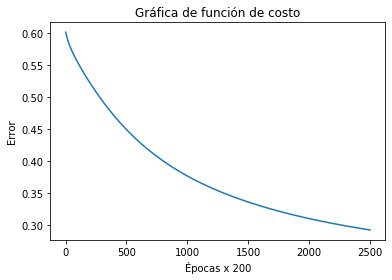

In [117]:
len_e = len(error_cost)
_x = np.linspace(1, len_e, len_e)

pyplot.plot(_x, error_cost)
pyplot.title('Gráfica de función de costo')
pyplot.ylabel('Error')
pyplot.xlabel('Épocas x 200')
pyplot.show()

## Realizar predicciones

In [38]:
X_test = X_test.T
X_test.shape

(2, 800)

In [39]:
z1 = np.dot(w1, X_test) + b1 
a1 = sigmoid(z1)
z2 = np.dot(w2, a1) + b2
out = sigmoid(z2)
out = out.reshape(800)

In [105]:
y_hat = []
for i in (out): 
    if i >= 0.5:
        y_hat.append(1)
    else: 
        y_hat.append(0)
        
y_test = y_test.reshape(y_test.shape[0])    # 1, y_test.shape[0]
y_test.shape

(800,)

In [106]:
y_hat = np.array(y_hat)
y_hat = y_hat.reshape(y_hat.shape[0]) 

## Metricas de evaluación

### Exactituid

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score = (y_test, y_hat)

## F1 Score

In [110]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat, average='macro')

0.8474532825677864

## ROC AUC

In [112]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_hat)

0.8474097409740974

## Matriz de confusión

In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat)

array([[346,  58],
       [ 64, 332]], dtype=int64)

In [118]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [119]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, X_train.T), X_tr, np.ravel(y_train))
plt.title("Decision Boundary for hidden layer size " + str(4))

NameError: name 'X_tr' is not defined